![](https://i.imgur.com/qkg2E2D.png)

# UnSupervised Learning Methods

## Exercise 004 - Part III

> Notebook by:
> - Royi Avital RoyiAvital@fixelalgorithms.com

## Revision History

| Version | Date       | User        |Content / Changes                                                   |
|---------|------------|-------------|--------------------------------------------------------------------|
| 0.1.000 | 16/06/2023 | Royi Avital | First version                                                      |

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/UnSupervisedLearningMethods/2023_03/Exercise0004Part003.ipynb)

In [ ]:
# Import Packages

# General Tools
import numpy as np
import scipy as sp
import pandas as pd

# Machine Learning
from sklearn.cluster import KMeans
from sklearn.datasets import make_s_curve, make_swiss_roll
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import kneighbors_graph

# Computer Vision

# Miscellaneous
import os
import math
from platform import python_version
import random
import time
import urllib.request

# Typing
from typing import Callable, List, Tuple, Union

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Jupyter
from IPython import get_ipython
from IPython.display import Image, display
from ipywidgets import Dropdown, FloatSlider, interact, IntSlider, Layout

from sklearn.neighbors    import kneighbors_graph
from scipy.sparse.csgraph import connected_components
from scipy.sparse.csgraph import shortest_path
from scipy.spatial.distance import cdist

from CourseAuxFun import *


## Notations

* <font color='red'>(**?**)</font> Question to answer interactively.
* <font color='blue'>(**!**)</font> Simple task to add code for the notebook.
* <font color='green'>(**@**)</font> Optional / Extra self practice.
* <font color='brown'>(**#**)</font> Note / Useful resource / Food for thought.

In [ ]:
# Configuration
# %matplotlib inline

seedNum = 512
np.random.seed(seedNum)
random.seed(seedNum)

# sns.set_theme() #>! Apply SeaBorn theme

runInGoogleColab = 'google.colab' in str(get_ipython())

In [ ]:
# Constants

DATA_FILE_URL   = r'https://drive.google.com/uc?export=download&confirm=9iBg&id=1lT6eWVRvfx_iusI9zB1fLg_g64n_141A'
DATA_FILE_NAME  = r'Rings5.mat'


In [ ]:
# Auxiliary Functions

def Plot3DScatter(mX: np.ndarray, hA: plt.Axes, vC: np.ndarray = None) -> None:
    m = mX.min()
    M = mX.max()
    if vC is not None:
        hA.scatter(*mX.T, s = 50,  c = vC, edgecolor = 'k', alpha = 1)
    else:
        hA.scatter(*mX.T, s = 50,  c = 'lime', edgecolor = 'k', alpha = 1)
    hA.set_xlim([m, M])
    hA.set_ylim([m, M])
    hA.set_zlim([m, M])
    hA.set_xlabel('$x_1$')
    hA.set_ylabel('$x_2$')
    hA.set_zlabel('$x_3$')

def Plot2DScatter(mX: np.ndarray, hA: plt.Axes, vC: np.ndarray = None) -> None:
    m = mX.min()
    M = mX.max()
    if vC is not None:
        hA.scatter(*mX.T, s = 50,  c = vC, edgecolor = 'k', alpha = 1)
    else:
        hA.scatter(*mX.T, s = 50,  c = 'lime', edgecolor = 'k', alpha = 1)
    hA.set_xlim([m, M])
    hA.set_ylim([m, M])
    hA.set_xlabel('$x_1$')
    hA.set_ylabel('$x_2$')


def MaximumSparseMat(mA: sp.sparse.spmatrix, mB: sp.sparse.spmatrix) -> sp.sparse.spmatrix:
    """
    Returns the element wise maximum of sparse matrices `mA` and `mB`.
    """
    mAgtB = (mA > mB).astype(int)
    mM = mAgtB.multiply(mA - mB) + mB

    return mM


## Guidelines

 - Fill the full names and ID's of the team members in the `Team Members` section.
 - Answer all questions / tasks within the Jupyter Notebook.
 - Use MarkDown + MathJaX + Code to answer.
 - Verify the rendering on VS Code.
 - Submission in groups (Single submission per group).
 - You may and _should_ use the forums for questions.
 - Good Luck!

* <font color='brown'>(**#**)</font> The `Import Packages` section above imports most needed tools to apply the work. Please use it.
* <font color='brown'>(**#**)</font> You may replace the suggested functions to use with functions from other packages.
* <font color='brown'>(**#**)</font> Whatever not said explicitly to implement maybe used by a 3rd party packages.
* <font color='brown'>(**#**)</font> The total run time of this notebook must be **lower than 60 [Sec]**.

## Generate / Load Data

In [ ]:
# Download Data
# This section downloads data from the given URL if needed.

if (DATA_FILE_NAME != 'None') and (not os.path.exists(DATA_FILE_NAME)):
    urllib.request.urlretrieve(DATA_FILE_URL, DATA_FILE_NAME)

## 8. IsoMap & Laplacian EigenMaps

### 8.1. IsoMap Algorithm (Bonus 4 Points)

In this section we'll implement a SciKit Learn API compatible class for the IsoMap algorithm.  
For the graphs we'll use the _K Nearest Neighbors_ approach.

The class should implement the following methods:

1. `__init____()` - The object constructor by the encoder dimension.  
2. `fit()` - Given a data set builds the encoder.  
3. `transform()` - Applies the encoding on the input data in out of sample manner.  
4. `fix_transform()` - Given a data set builds the encoder and applies the encoding.  

* <font color='brown'>(**#**)</font> Pay attention to data structure (`Nx x Nx` / `Nx x Ny`).
* <font color='brown'>(**#**)</font> Do not use any loops in you implementation.
* <font color='brown'>(**#**)</font> You should use your `CMDS()` implementation.
* <font color='brown'>(**#**)</font> Use `from CourseAuxFun.py import *` to import your code.
* <font color='brown'>(**#**)</font> You should use SciKit Learn's `sklearn.neighbors.kneighbors_graph`. Pay attention the output is a sparse matrix.
* <font color='brown'>(**#**)</font> You should use SciPy's `scipy.sparse.csgraph.connected_components` to check the graph is valid (Connected).  
* <font color='brown'>(**#**)</font> You should use SciPy's `scipy.sparse.csgraph.shortest_path` to computer the pairs shortest path matrix.  
* <font color='brown'>(**#**)</font> For the `transform()` methods you should use SciKit Learn's `sklearn.neighbors.NearestNeighbors`.  

**Remark**: The bonus is for manual implementation. You may use SciKit Learn's [Isomap]() without the bonus.

In [ ]:
class IsoMap():
    def __init__(self, d: int = 2, k: int = 9):
        '''
        Constructing the object.
        Args:
            d - Number of dimensions of the encoder output.
            k - Number of neighbors in the graph construction.
        '''
        #===========================Fill This===========================#
        # 1. Keep the model parameters.

        self.d = d
        self.k = k
        #===============================================================#

    def fit(self, mX: np.ndarray):
        '''
        Fitting model parameters to the input.
        Args:
            mX - Input data with shape N x D.
        Output:
            self
        '''
        #===========================Fill This===========================#
        # 1. Build the graph from the data.
        # 2. Verify the graph is connected (Raise error if not).
        # 3. Build the encoder.
        # !! Use the K-NN method to build the graph.
        # !! Make sure the graph obeys the assumptions made.
        # !! The encoder should be based on the CMDS() class.

        graph = kneighbors_graph(mX, self.k, mode='distance', include_self=True)  # k includes self
        # directed = False -> makes the grapth symetric. Alternative use the function MaximumSparseMat assumes non connection = 0
        n_components , _ = connected_components(csgraph=graph, directed=False)
        if n_components > 1:
            print ("ERROR: generated graph is not connected. optional use a bigger k")
            print (f'Number of components {n_components}')

            return self

        Dxx        = shortest_path(csgraph=graph, directed=False)
        CMDS_inst  = CMDS(d = self.d)
        CMDS_inst.fit(Dxx**2)  # Our MDS class assumes distance matrix received is not squared

        # Save later for OOS by the transform function
        self.mX        = mX
        self.Dxx       = Dxx
        self.CMDS_inst = CMDS_inst

        #===============================================================#
        return self

    def transform(self, mY: np.ndarray) -> np.ndarray:
        '''
        Applies (Out of sample) encoding.
        Args:
            mY - Input data (Out of Sample) with shape N x D.
        Output:
            mZ - Low dimensional representation (embeddings) with shape N x d.
        '''
        #===========================Fill This===========================#
        # 1. Encode data using the model encoder.

        # for each OOS  find: 1, The closet training data.  2. The distacne to this point
        Dxy_L2         = cdist(self.mX , mY , metric='euclidean') # Note:  cdist works on rows
        Dxy_L2_min     = Dxy_L2.min(axis = 0)
        Dxy_L2_min_idx = Dxy_L2.argmin(axis = 0)
        # Use the training distances . for each OOS distance is based on closet training instance
        Dxy            = self.Dxx[Dxy_L2_min_idx,:] + Dxy_L2_min.reshape(-1,1)

        mZ             = self.CMDS_inst.transform(Dxy**2)

        #===============================================================#

        return mZ

    def fit_transform(self, mX: np.ndarray) -> np.ndarray:
        '''
        Applies encoding on the input.
        Args:
            mX - Input data (Distance matrix) with shape N x D.
        Output:
            mZ - Low dimensional representation (embeddings) with shape N x d.
        '''
        #===========================Fill This===========================#
        # 1. Apply the `fit()` method.
        # 2. Encode data using the model encoder.

        self.fit(mX)
        mZ = self.transform(mX)
        #===============================================================#

        return mZ


* <font color='red'>(**?**)</font> Will `fit()` and then `transform()` will match the result of `fit_transform()`?  
  Make sure you understand this before proceeding.

<b>
For IsoMap Fit_transform is  equal to fit and then transform.   
This is because for the OOS transform there will be a training instacne with L2 distance = 0 for each OOS



### 8.2. Laplacian EigenMaps Algorithm

In this section we'll implement a SciKit Learn API compatible class for the Laplacian EigenMaps.  

The class should implement the following methods:

1. `__init____()` - The object constructor by the encoder dimension.  
2. `fit()` - Given a data set ($\boldsymbol{D}_{xx}$) builds the encoder.    
4. `fit_transform()` - Given a data set ($\boldsymbol{D}_{xx}$) builds the encoder and applies the encoding.  

* <font color='brown'>(**#**)</font> Pay attention to data structure (`Nx x Nx` / `Nx x Ny`).
* <font color='brown'>(**#**)</font> Do not use any loops in you implementation beside the main MM loop.
* <font color='brown'>(**#**)</font> Think about the difference in `transform()` and `fit_transform()` compared to `CMDS()` above.

In [ ]:
class LaplacianEigenMaps():
    def __init__(self, d: int = 2, k: int = 9, σ: float = 1):
        '''
        Constructing the object.
        Args:
            d - Number of dimensions of the encoder output.
            k - Number of neighbors in the graph construction.
            σ - The factor to multiply the median distance by.
        '''
        #===========================Fill This===========================#
        # 1. Keep the model parameters.

        self.d = d
        self.k = k
        self.σ = σ
        #===============================================================#

    def fit(self, mX: np.ndarray):
        '''
        Fitting model parameters to the input.
        Args:
            mX - Input data with shape N x D.
        Output:
            self
        '''
        #===========================Fill This===========================#
        # 1. Build a valid graph.
        # 2. Calculate the number of connected components in the graph.
        # 3. Keep the parameters in the object.
        # !! Raise error if the graph has more than 1 connected component.

        graph = kneighbors_graph(mX, self.k, mode='connectivity',   include_self=True)  # my decision that is to  include self
        n_components , _ = connected_components(csgraph=graph, directed=False)

        if n_components > 1:
            print ("Generated graph is not connected. For connectivity, increase k")
            print (f'Number of components {n_components}')

        # Both works - Make sure the distance are symmetric
        #self.graph_array = (graph.toarray() > 0) + (graph.toarray().T > 0)  # when not connected it is "0"
        self.graph_array = MaximumSparseMat(graph , graph.T).toarray()

        #===============================================================#
        return self

    def fit_transform(self, mX: np.ndarray) -> np.ndarray:
        '''
        Applies encoding on input data.
        Args:
            mX - Input data (Distance matrix) with shape N x D.
        Output:
            mZ - Low dimensional representation (embeddings) with shape N x d.
        '''
        #===========================Fill This===========================#
        # 1. Apply the `fit()` method.
        # 2. Build the distance matrix.
        # 3. Set σ^2 to be the median squared euclidean distance multiplied by `self.σ^2``.
        # 4. Build the Affinity Matrix using Gaussian Weights.
        # 5. Build the Laplacian.
        # 6. Apply eigen decomposition to the Laplacian.
        # 7. Choose the eigen vectors wisely.
        # 8. Encode data.
        # !! You should chose the vectors

        #1
        self.fit(mX)
        #2
        dist_matrix = cdist(mX , mX , metric='euclidean') # Note:  cdist works on rows
        #3
        median_dist = np.median(dist_matrix**2)
        σ_square    = self.σ**2 * median_dist
        #4
        W           = np.exp(-dist_matrix**2/(2*σ_square)) * self.graph_array  # Affinity Matrix
        #5
        D           = np.diag(W.sum(axis = 1))
        L           = D-W
        #6
        #s2, v       = sp.sparse.linalg.eigsh(L ,k=self.d+1 , which='LM' , return_eigenvectors=True)  #+1 as eigen vector 0 is not good
        s2, v        = sp.linalg.eigh(L)

        #7
        # v           = v[:,1:self.d+1] # skip first
        v           = v[:,:self.d+1] #screen constant from d+1 first
        constant_column = np.all(a == a[0,:], axis = 0)
        ind_keep = np.where(np.logical_not(constant_column))[0]
        mZ = v[:, ind_keep]

        #===============================================================#

        return mZ


* <font color='red'>(**?**)</font> Why is the `transform()` method not asked to be implemented?  
  Make sure you understand this before proceeding.

<b>LaplacianEigenMaps has no OOS Support

### 8.3. Clustering Using Dimensionality Reduction

In this section the IsMap and Laplacian Eigenmaps methods will be used for clustering of the _5 Rings_ data set.

For each data set:

1. Plot the Data Set  
   Plot the Data set in 3D.  
   **This is implemented**.
2. Reduce the Dimensionality of the Data  
   Reduce the dimensionality of the data to `d = 2` using each method.  
   Set the number of neighbors in the graph so the graph has a single component.
3. Apply the Clustering  
   Use K-Means for clustering with `k = 5`.  
4. Plot the Clustered Data  
   Plot the data with the clustering per method.  
   Plot the transformed labeled data and the original data per method.

* <font color='brown'>(**#**)</font> Pay attention to the difference in dimensions of the data to the derived Math formulations.
* <font color='brown'>(**#**)</font> The output should be 2 figures for each data set. You may show them in a single plot using sub plots.

In [ ]:
# Generate Data

mX = sp.io.loadmat('Rings5.mat')['pointCloud']
mX = mX.T

print(f'The data dimensions are {mX.shape[0]}x{mX.shape[1]}')

The data dimensions are 1000x3


In [ ]:
mX

array([[ 9.99992058e-01,  7.04539117e-02,  1.11054030e-03],
       [ 9.99057319e-01,  2.81779807e-02,  1.01875842e-02],
       [ 9.98186179e-01,  7.32991180e-02, -1.30902739e-02],
       ...,
       [ 7.66214495e-04, -1.37961683e+00,  9.96605472e-01],
       [ 2.54146149e-02, -1.42932946e+00,  9.96764251e-01],
       [-1.50355250e-02, -1.45644731e+00,  9.99452568e-01]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


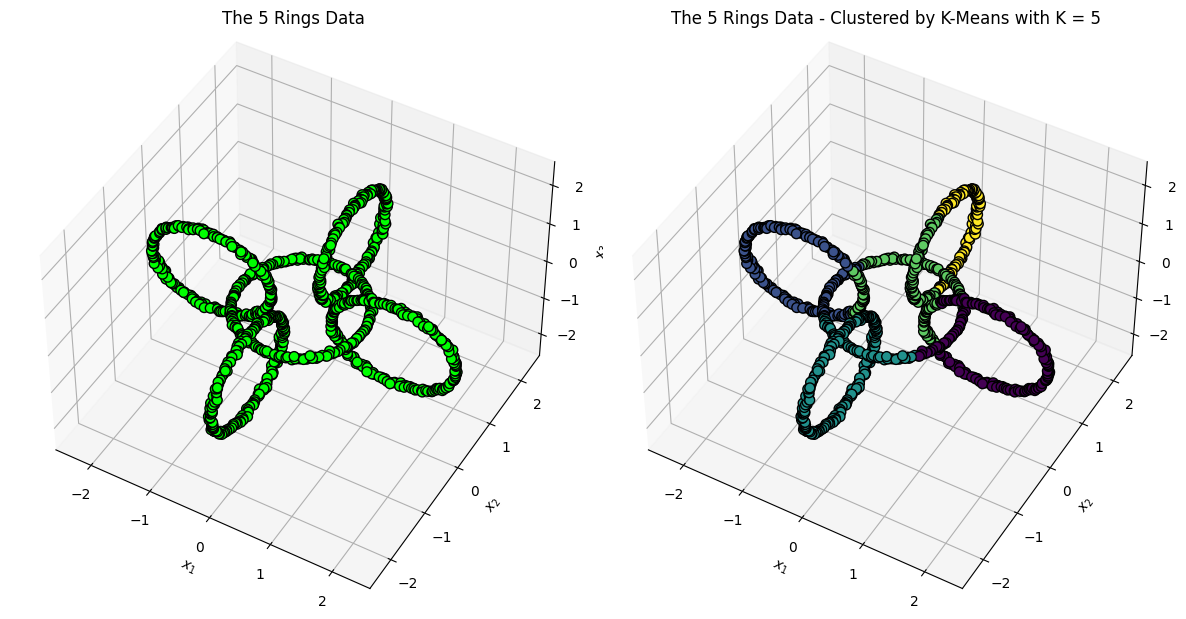

In [ ]:
# Plot Data
# Plotting the Data and a reference clustering by K-Means

K = 5 #<! Number of clusters

#oKMeansCluster  = KMeans(n_clusters = K, n_init = 'auto')
oKMeansCluster  = KMeans(n_clusters = K)

vC              = oKMeansCluster.fit_predict(mX)

hF  = plt.figure(figsize = (12, 6))
hA1 = hF.add_subplot(1, 2, 1, projection = '3d')
hA2 = hF.add_subplot(1, 2, 2, projection = '3d')

Plot3DScatter(mX, hA1)
hA1.set_title('The 5 Rings Data')
hA1.view_init(elev = 45, azim = 300)

Plot3DScatter(mX, hA2, vC = vC)
hA2.set_title(f'The 5 Rings Data - Clustered by K-Means with K = {K}')
hA2.view_init(elev = 45, azim = 300)

plt.tight_layout()
plt.show()

In [ ]:
#===========================Fill This===========================#
# 1. Set parameters: `d`, `kNumNeighbors`, `σ` (Try to get a good clustering result).
# 2. Apply Dimensionality Reduction using IsoMap and Laplacian Eigen Maps.
# 3. Apply K-Means on the transformed data.
# 4. Display the clustered data in 2D (Low Dimension) and 3D (Original).
# !! You should use, in this case, the same number of neighbors for both algorithms.
# !! The output should be a figure of 2x2 axes (2D Scatter and 3D Scatter per method).
# !! You may use `Plot3DScatter()` and `Plot2DScatter()` for displaying the the data.


kNumNeighbors   = 32  # The minimal number that generates connected graph
σ               = 0.05

# IsoMap
d               = 2
IsoMap_inst = IsoMap(d =d , k=32)
mZ_isomap   = IsoMap_inst.fit_transform(mX)

MeansCluster_isomap  = KMeans(n_clusters = 5)
vC_isomap            = MeansCluster_isomap.fit_predict(mZ_isomap)

# Laplacian
# we selected d according to the number of required clusters
d = 5
LaplacianEigenMaps_inst = LaplacianEigenMaps(d =d , k=32 , σ=σ)
mZ_laplacian_d5            = LaplacianEigenMaps_inst.fit_transform(mX)

MeansCluster_laplacian  = KMeans(n_clusters = 5)
vC_laplacian            = MeansCluster_laplacian.fit_predict(mZ_laplacian_d5)

# Just for plot go to d = 2 (but the clusters were defined based on d = 5)
LaplacianEigenMaps_inst = LaplacianEigenMaps(d =2 , k=32 , σ=σ)
mZ_laplacian            = LaplacianEigenMaps_inst.fit_transform(mX)

#===============================================================#

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


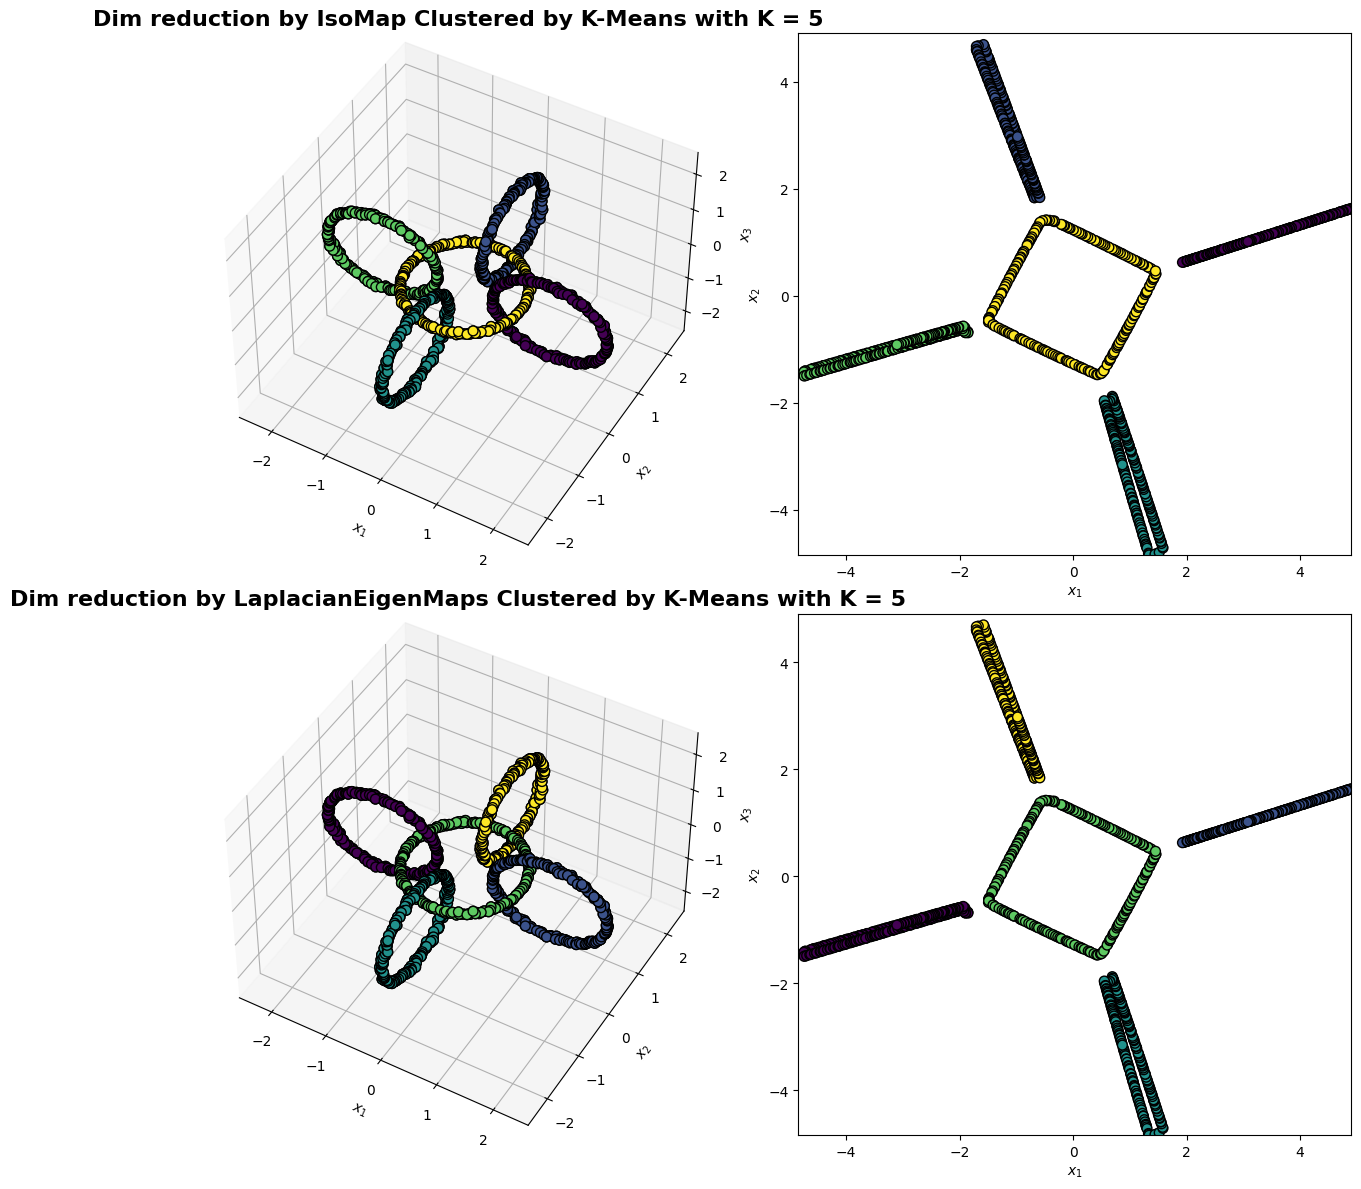

In [ ]:
fig = plt.figure(figsize = (12, 12))

ax1 = fig.add_subplot(2, 2, 1, projection = '3d')
Plot3DScatter(mX, ax1)
Plot3DScatter(mX, ax1, vC = vC_isomap)
ax1.set_title(f'Dim reduction by IsoMap Clustered by K-Means with K = {K}', fontsize=16,fontweight="bold")
ax1.view_init(elev = 45, azim = 300)

ax2 = fig.add_subplot(2,2, 2)
Plot2DScatter(mZ_isomap, ax2, vC = vC_isomap)


ax3 = fig.add_subplot(2, 2, 3, projection = '3d')
Plot3DScatter(mX, ax3)
Plot3DScatter(mX, ax3, vC = vC_laplacian)
ax3.set_title(f'Dim reduction by LaplacianEigenMaps Clustered by K-Means with K = {K}', fontsize=16,fontweight="bold")
ax3.view_init(elev = 45, azim = 300)

ax3 = fig.add_subplot(2,2, 4)
Plot2DScatter(mZ_isomap, ax3, vC = vC_laplacian)


plt.tight_layout()
plt.show()


### 8.4. Question

In the above we used _Laplacian Eigenmaps_ for dimensionality reduction and then clustering.  
What would change if the task was to apply Spectral Clustering?  
Describe what will happen for the data above (The _5 Rings_).  
Address the changes needed in the implementation of the class `LaplcaianEigenMaps()` and the use of the class.

* <font color='brown'>(**#**)</font> You should use the ideas in _Question 5.2._.

### 8.4. Solution

Since we started with dimensionality reduction, we generated a fully connected graph. This was achieved by selecting the minimal neighborhoods (in our case 32) for a achieving a connected graph.
For a spectral clustering task, we do not need to limit ourselves to a connected graph. All we need is that the number of components of the graph will be <= Number of required clusters. If the number of components = Number of good clusters, we are done. Each instance belongs to one component = one cluster.  For the case number of components < number of clusters we can proceed with a hierarchical clustering approach. That is preform spectral clustering on one / more of the components achieved from the previous step. Finally total number of components must be equal to the number of required clusters.  

Instead of checking the number of connected components by any algorithm we can use the results of Laplacian EVD. As shown in Question 5.2 the number of components can be derived by the number of orthogonal eigenvectors that have an eigenvalue of zero. For clustering, we exclude the constant eigenvector and take the K+1 smallest eigenvector.

What will we have for the 5 Ring data?  with K = 5 we can achieve a graph of 5 components. Then we are done. See below.

The changes for the class LaplcaianEigenMaps() should be the following:

- Adjust the number of neighbors until the number of connected components is the same as the requires number of clusters K.
- Find eigenvectors/values of the Laplacian matrix
- Take the first K+1 vectors with lowest eigenvalues. K of them will be with eigenvalue 0.
- Remove the constant eigenvector (already implemented).
- With the remaining K first eigenvectors, we map each sample to the vector defined by the entries in the eigenvectors. Theoretically, we should have K unique K-dimensional vectors which are the cluster identifiers.
- We cluster our samples according to this representation.
- Note - if the connected components are not the clusters we want, we can exclude the relevant eigenvector and use another one, etc.



In [ ]:
LaplacianEigenMaps_inst = LaplacianEigenMaps(d = 5 , k=5 , σ=1)
mZ_laplacian            = LaplacianEigenMaps_inst.fit_transform(mX)

Generated graph is not connected. For connectivity, increase k
Number of components 5



We have checked below the differecne between d = 5 and d=2 for clustering = 5

Both get the same good separation.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


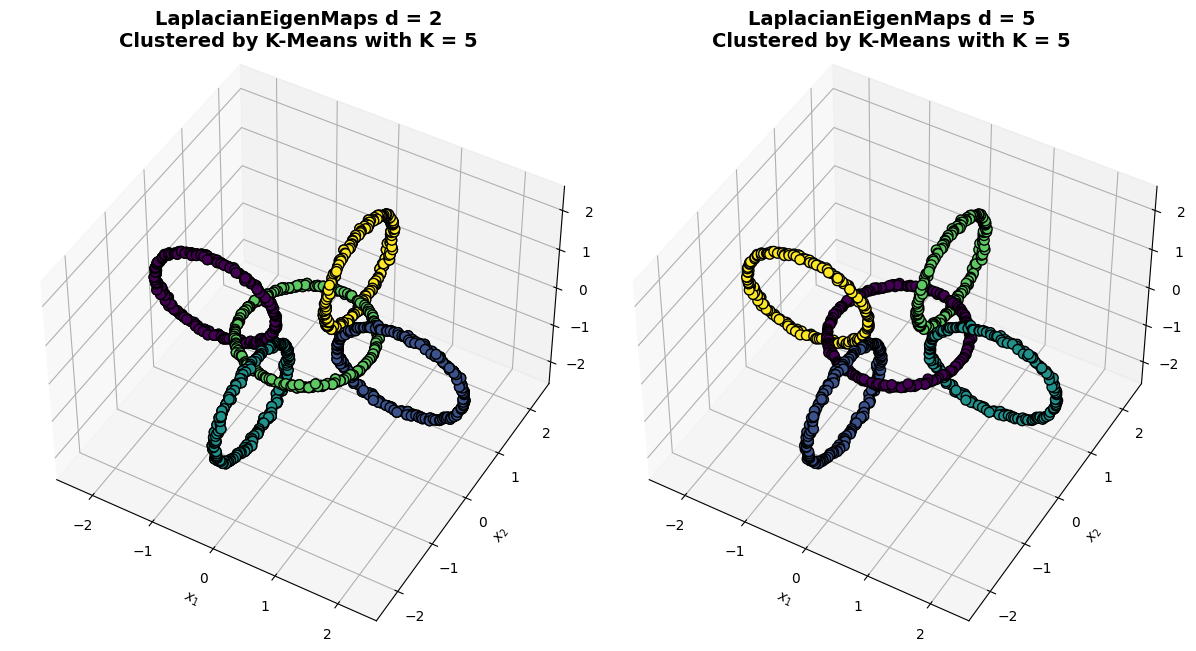

In [ ]:
# Laplacian d = 5 (d = number of clusters )
LaplacianEigenMaps_d5_inst = LaplacianEigenMaps(d = 5 , k=32 , σ=σ)
mZ_laplacian_d5            = LaplacianEigenMaps_d5_inst.fit_transform(mX)

MeansCluster_laplacian_d5  = KMeans(n_clusters = 5)
vC_laplacian_d5            = MeansCluster_laplacian_d5.fit_predict(mZ_laplacian_d5)


fig = plt.figure(figsize = (12, 12))

ax1 = fig.add_subplot(1, 2, 1, projection = '3d')
Plot3DScatter(mX, ax1)
Plot3DScatter(mX, ax1, vC = vC_laplacian)
ax1.set_title(f'LaplacianEigenMaps d = 2\nClustered by K-Means with K = {K}', fontsize=14,fontweight="bold")
ax1.view_init(elev = 45, azim = 300)



ax2 = fig.add_subplot(1, 2, 2, projection = '3d')

Plot3DScatter(mX, ax2, vC = vC_laplacian_d5)
ax2.set_title(f'LaplacianEigenMaps d = 5\nClustered by K-Means with K = {K}', fontsize=14,fontweight="bold")
ax2.view_init(elev = 45, azim = 300)


plt.tight_layout()
plt.show()
